In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploring the data

## Importing value and lowercase everything

In [296]:
data_df = pd.read_csv('../raw_data/1M_rows_raw.csv')

for column in data_df.columns:
    if data_df[column].dtype == 'O':
        data_df[column] = data_df[column].str.lower()

# data_df.columns
# type(data_df['date'][0])
data_df['price'].dtype 

dtype('float64')

In [297]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964433 entries, 0 to 964432
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _sdc_source_key_id  964433 non-null  float64
 1   sku                 956358 non-null  object 
 2   date                964433 non-null  object 
 3   price               964433 non-null  float64
 4   quantity            964433 non-null  int64  
 5   discount            964433 non-null  float64
 6   price_qty           964433 non-null  float64
 7   vendor              821608 non-null  object 
 8   title               821608 non-null  object 
 9   product_type        648418 non-null  object 
 10  tags                564903 non-null  object 
 11  email               952005 non-null  object 
 12  gender              948055 non-null  object 
 13  age                 903666 non-null  float64
 14  Nationality         504784 non-null  object 
 15  premium_status      964433 non-nul

In [298]:
# data_df.head()

## Column renamimg

In [299]:
data_df.rename(columns={'_sdc_source_key_id':'order_ID',
                        'sku':'item_ID',
                        'item price':'item_price',
                        'item quantity':'item_quantity',
                        'line-item discount':'discount',
                        'price_qty':'final_price',
                        'email':'customer_ID',
                        'Nationality':'nationality'
                        },
                             inplace = True)
data_df.columns

Index(['order_ID', 'item_ID', 'date', 'price', 'quantity', 'discount',
       'final_price', 'vendor', 'title', 'product_type', 'tags', 'customer_ID',
       'gender', 'age', 'nationality', 'premium_status', 'district'],
      dtype='object')

## Working on NA and strange values

In [300]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.84%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.81%
NA values in title : 14.81%
NA values in product_type : 32.77%
NA values in tags : 41.43%
NA values in customer_ID : 1.29%
NA values in gender : 1.7%
NA values in age : 6.3%
NA values in nationality : 47.66%
NA values in premium_status : 0.0%
NA values in district : 6.76%


In [301]:
data_df.shape

(964433, 17)

### Droping NA item_ID, customer_ID

In [302]:
data_df.dropna(subset=['item_ID', 'customer_ID'],inplace=True)

In [303]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.24%
NA values in title : 14.24%
NA values in product_type : 31.96%
NA values in tags : 40.43%
NA values in customer_ID : 0.0%
NA values in gender : 0.41%
NA values in age : 5.03%
NA values in nationality : 46.95%
NA values in premium_status : 0.0%
NA values in district : 5.5%


In [304]:
data_df.shape

(947364, 17)

### For district, nationality, gender,  - most comun one

#### district

In [305]:
# data_df['district'].unique()

In [306]:
for district in data_df['district'].unique():
    count=data_df[data_df['district'] == district]['district'].count()
    if count/len(data_df)*100 > 5:
        print(f'{district} : {round(    count   /   len(data_df)  *  100     ,2)}%')

kowloon city : 5.5%
eastern : 9.11%
central & western : 32.94%
wan chai : 6.58%
southern : 5.81%


In [307]:
data_df['district'] = data_df['district'].fillna('central & western')

#### nationality

In [308]:
# data_df['nationality'].unique()

In [309]:
for nationality in data_df['nationality'].unique():
    count=data_df[data_df['nationality'] == nationality]['nationality'].count()
    if count/len(data_df)*100 > 1:
        print(f'{nationality} : {round(    count   /   len(data_df)  *  100     ,2)}%')

hong kong sar : 39.2%
united kingdom : 1.47%
other : 3.56%
china : 3.0%
korea : 1.46%
france : 1.37%
american samoa : 1.2%


In [310]:
data_df['nationality'] = data_df['nationality'].fillna('hong kong sar')

#### gender

In [311]:
data_df['gender'].unique()

array(['male', 'female', nan, 'other'], dtype=object)

In [312]:
for gender in data_df['gender'].unique():
    count=data_df[data_df['gender'] == gender]['gender'].count()
    if count/len(data_df)*100 > 0:
        print(f'{gender} : {round(    count   /   len(data_df)  *  100     ,2)}%')

male : 13.21%
female : 86.37%
other : 0.01%


In [313]:
data_df['gender'] = data_df['gender'].fillna('female')

In [314]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.24%
NA values in title : 14.24%
NA values in product_type : 31.96%
NA values in tags : 40.43%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 5.03%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%


In [315]:
data_df.shape

(947364, 17)

### For age - use the mean for nan and outliers

#### OLD / mean for nan

In [316]:
data_df['age'] = data_df['age'].fillna(round(data_df['age'].mean()))

#### outliers

In [317]:
data_df.loc[data_df['age'] < 18, 'age'] = round(data_df['age'].mean())
data_df.loc[data_df['age'] > 90, 'age'] = round(data_df['age'].mean())
# data_df.loc[data_df['age'] < 18, 'age'] = np.nan
# data_df.loc[data_df['age'] > 90, 'age'] = np.nan

<function matplotlib.pyplot.show(close=None, block=None)>

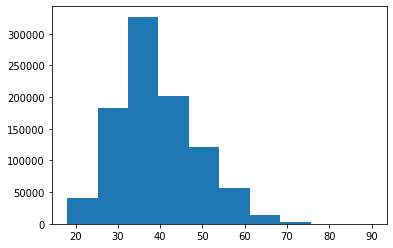

In [318]:
plt.hist(data_df['age'])
plt.show

In [319]:
data_df.shape

(947364, 17)

In [320]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.24%
NA values in title : 14.24%
NA values in product_type : 31.96%
NA values in tags : 40.43%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 0.0%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%


### For now : drop nan vendor (QUESTION)

In [321]:
# data_df[data_df['vendor'].isnull()]

In [322]:
data_df.dropna(subset=['vendor'],inplace=True)

In [323]:
data_df.shape

(812481, 17)

In [324]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 0.0%
NA values in title : 0.0%
NA values in product_type : 20.67%
NA values in tags : 30.54%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 0.0%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%


### Work on free items

In [325]:
data_df[data_df['price'] == 0]['price'].count()

32413

In [326]:
data_df = data_df[data_df['price'] != 0]
data_df.shape

(780068, 17)

### Work on OTL membership sales

In [327]:
# data_df.loc[data_df['title'].str.contains('membership')]['title'].unique()
data_df = data_df[data_df['title'] != 'onthelist premium membership']
data_df.shape

(776802, 17)

### Work on other OTL sales

In [328]:
data_df.loc[data_df['vendor'].str.contains('onthelist')]['vendor'].unique()

array(['onthelist', 'onthelist hk', 'onthelisttest'], dtype=object)

In [329]:
data_df = data_df[data_df['vendor'] != 'onthelist']
data_df = data_df[data_df['vendor'] != 'onthelist hk']
data_df = data_df[data_df['vendor'] != 'onthelisttest']
data_df.shape

(776689, 17)

## Ading the off/on columns (QUESTION)

In [331]:
data_df['on_off'] = '__'


data_df.loc[data_df["vendor"].str.contains('-online'),'on_off'] = 'online'
data_df.loc[data_df["vendor"].str.contains('- online'),'on_off'] = 'online'
data_df.loc[data_df["vendor"].str.contains('-onlione'),'on_off'] = 'online'


data_df.loc[data_df["vendor"].str.contains('-offline'),'on_off'] = 'offline'
data_df.loc[data_df["vendor"].str.contains('- offline'),'on_off'] = 'offline'


# data_df[data_df["on_off"] == '__']['vendor'].count(),data_df[data_df["on_off"] == '__']['vendor'].unique()
data_df = data_df[data_df['on_off'] != '__']
# data_df.shape
# data_df[data_df['vendor'].str.contains('ortea')]

## Creat the tmp with vendor, title, product and tags for the NLP

In [332]:
# data_df['vendor'].fillna('',inplace=True)
# data_df['title'].fillna('',inplace=True)
# data_df['product_type'].fillna('',inplace=True)
# data_df['tags'].fillna('',inplace=True)
# data_df['tmp_NLP']= data_df['vendor']+' '+data_df['title']+' '+data_df['product_type']+' '+data_df['tags']

data_df['vendor_tmp'] = data_df['vendor'].astype(str)
data_df['title_tmp'] = data_df['title'].astype(str)
data_df['product_type_tmp'] = data_df['product_type'].astype(str)
data_df['tags_tmp'] = data_df['tags'].astype(str)
data_df['tmp_NLP'] = data_df[['vendor_tmp', 'title_tmp', 'product_type_tmp', 'tags_tmp']].agg(' '.join, axis=1)
data_df = data_df.drop(columns=['vendor_tmp', 'title_tmp', 'product_type_tmp', 'tags_tmp'])


In [333]:
# data_df[data_df['tmp_NLP'].isnull()]
data_df.shape

(772116, 19)

In [334]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 0.0%
NA values in title : 0.0%
NA values in product_type : 21.32%
NA values in tags : 26.98%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 0.0%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%
NA values in on_off : 0.0%
NA values in tmp_NLP : 0.0%


# NLP process

## extracting 100_000 rows

In [56]:
data_sample_100_000_df = data_df.sample(n = 100_000,random_state=42)
data_sample_100_000_df = data_sample_100_000_df.dropna()
data_sample_100_000_df.shape

(66170, 19)

In [42]:
# for column in data_sample_100_000_df.columns:
#     print(f'NA values in {column} : {round(data_sample_100_000_df[column].isnull().sum()/len(data_sample_100_000_df)*100,2)}%')

## creating train and test set

In [378]:
data_sample_100_000_df['product_gender'] = 'unisex'
data_sample_100_000_df['product_cat'] = '__'
data_sample_100_000_df['tags'] = data_sample_100_000_df["tags"].str.replace(',',' ')

##Type of product
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('\d{2}'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]x*s[\s|]'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]m[\s|]'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]x*l[\s|]'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('shirt'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('dress'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('underwear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('trousers'),'product_cat'] = 'clothes'


data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('watershorts'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('top'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('dresses'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('trousers'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('clothing'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('apparel'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('ready-to-wear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('underwear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('bra'),'product_cat'] = 'clothes'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('risinglotus'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('aliceolivia'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('casacalvin'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('risinglotus'),'product_cat'] = 'clothes'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('shoes'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('footwear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('boot'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('slippers'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('sandal'),'product_cat'] = 'clothes'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('bath & body'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('fragrance'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('the body shop'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('dermatory'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('bathing'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('sheet mask'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('cleansing'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('serum'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('skincare set'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('makeup'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('shower gel'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('defrisant'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('skincare'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('shampoo'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('leave-in beauty'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('phyto'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('shiseido'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('bareminerals'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('lip'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('skin'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('personal care appliance'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('make-up'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('make up'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('hand care'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('anti-aging'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('face'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('eyes'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('hair'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('moisturising'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('aromatherapy associates'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('bodycare'),'product_cat'] = 'bath_body'

data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]bag'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('goggles'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('tech accessories'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('accessories'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('bag'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('bags'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('cap'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('jewelry'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('jewellery'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('accessories'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('wallets'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('belts'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('rings'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('scarf'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('goods'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('handbags'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('wallet'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('sunglasses'),'product_cat'] = 'accessory'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('qwehli'),'product_cat'] = 'food'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('seafood'),'product_cat'] = 'food'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('beef'),'product_cat'] = 'food'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('plantin kaviari'),'product_cat'] = 'food'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('wine'),'product_cat'] = 'wine'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('altaya'),'product_cat'] = 'wine'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('or tea'),'product_cat'] = 'drink'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('ortea'),'product_cat'] = 'drink'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('tea'),'product_cat'] = 'drink'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('lecreuset'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('le creuset'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('stojostasher'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('kitchenware'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('kitchenware'),'product_cat'] = 'kitchen'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('home electronics'),'product_cat'] = 'home_appliance'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('homeware'),'product_cat'] = 'home_appliance'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('candle'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('towel'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('bedding set'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('writitng'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('writing'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('luggage'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('cuddledry'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('paper product'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('pillow case'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('riedel'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["moleskine"].str.contains('riedel'),'product_cat'] = 'home'



### Gender of the product
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]men'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^men'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]male'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^male'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]man'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^man'),'product_gender'] = 'men'

data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]women'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^women'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]female'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^female'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]woman'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^woman'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('^jewel'),'product_gender'] = 'women'

data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]junior'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^junior'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]baby'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^baby'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('.*baby.*'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('.*kids.*'),'product_gender'] = 'children'

# data_sample_100_000_df[(data_sample_100_000_df['product_cat'] != '__')][['vendor','title','product_type','tags','product_cat','product_gender']]
# len(data_sample_100_000_df[(data_sample_100_000_df['product_cat'] == '__')])

# data_sample_100_000_df[(data_sample_100_000_df['product_gender'] == '__')]
# data_sample_100_000_df.head(60)

KeyError: 'moleskine'

In [94]:
data_for_train_test = data_sample_100_000_df[(data_sample_100_000_df['product_cat'] != '__')]
# data_for_train_test
# data_for_train_test.to_csv('../raw_data/50000_rows_for_first_model.csv')
data_for_train_test.shape

(56719, 21)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data_for_train_test['tmp_NLP']
y = data_for_train_test['product_cat']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
data_for_train_test.product_cat.unique()

array(['home', 'clothes', 'accessory', 'bath_body', 'drink', 'kitchen',
       'wine', 'home_appliance', 'food'], dtype=object)

In [97]:
liste = list(label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8]))
dict_label = {}

for i in range (9):
    dict_label[i] = liste[i]

dict_label

{0: 'accessory',
 1: 'bath_body',
 2: 'clothes',
 3: 'drink',
 4: 'food',
 5: 'home',
 6: 'home_appliance',
 7: 'kitchen',
 8: 'wine'}

## tokenizer

In [98]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

In [99]:
len(X_train_token[0])

11

In [102]:
max_size = 0
for element in X_train_token:
    if len(element) > max_size:
        max_size = len(element)

print(max_size)

78


In [103]:
vocab_size = max([i for i in tokenizer.word_index.values()]) 

vocab_size

12434

## pading

In [104]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_token_pad = pad_sequences(X_train_token,
                                  maxlen=max_size,
                                  dtype='int32', 
                                  padding='post', 
                                  value=0.0)

X_test_token_pad = pad_sequences(X_test_token,
                                 maxlen=max_size,
                                 dtype='int32', 
                                 padding='post', 
                                 value=0.0)

## Model 

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.Embedding(input_dim=vocab_size+1, # 16 +1 for the 0 padding
                           input_length=max_size, # Max_sentence_length (optional, for model summary)
                           output_dim=100,# 100
                           mask_zero=True, # Included masking layer :)
                          ))

model.add(layers.LSTM(units=20))
model.add(layers.Dense(10,activation="relu"))
model.add(layers.Dense(10,activation="relu"))
model.add(layers.Dense(9,activation="softmax"))

In [55]:
# model.summary()

In [106]:
X_train_token_pad.shape,y_train.shape

((38001, 78), (38001,))

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics='accuracy')
                       
es = EarlyStopping(patience=4,restore_best_weights=True)

history = model.fit(X_train_token_pad, y_train,
                    validation_split=0.2,
                    epochs=20, 
                    callbacks=[es],
                    batch_size=512,
                    verbose=1)

Epoch 1/20
60/60 [==============================] - 40s 632ms/step - loss: 1.1467 - accuracy: 0.7005 - val_loss: 0.5800 - val_accuracy: 0.7887
Epoch 2/20
60/60 [==============================] - 33s 554ms/step - loss: 0.4186 - accuracy: 0.8163 - val_loss: 0.3002 - val_accuracy: 0.8248
Epoch 3/20
60/60 [==============================] - 35s 589ms/step - loss: 0.1534 - accuracy: 0.9579 - val_loss: 0.0896 - val_accuracy: 0.9803
Epoch 4/20
60/60 [==============================] - 31s 518ms/step - loss: 0.0480 - accuracy: 0.9871 - val_loss: 0.0488 - val_accuracy: 0.9851
Epoch 5/20
60/60 [==============================] - 29s 489ms/step - loss: 0.0233 - accuracy: 0.9965 - val_loss: 0.0340 - val_accuracy: 0.9957
Epoch 6/20
60/60 [==============================] - 41s 683ms/step - loss: 0.0121 - accuracy: 0.9991 - val_loss: 0.0262 - val_accuracy: 0.9964
Epoch 7/20
60/60 [==============================] - 50s 834ms/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.0233 - val_accuracy: 0.9967

In [108]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0,0.1)
    plt.show()

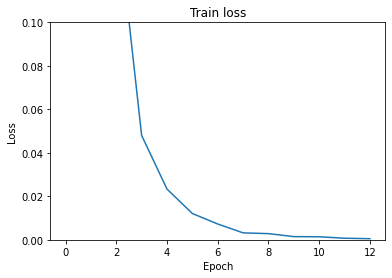

In [109]:
plot_history(history)

In [110]:
model.evaluate(X_test_token_pad, y_test, verbose=1)

585/585 [==============================] - 36s 62ms/step - loss: 0.0254 - accuracy: 0.9970


[0.02535378560423851, 0.997008204460144]

# Validation of the model

In [268]:
data_for_validation_df = data_df.sample(n = 1000,random_state=0)
data_for_validation_df = data_for_validation_df.dropna()
data_for_validation_df.shape

(1000, 18)

In [269]:
X_val = data_for_validation_df['tmp_NLP']
X_val_token = tokenizer.texts_to_sequences(X_val)
X_val_token_pad = pad_sequences(X_val_token,
                                 maxlen=75,
                                 dtype='int32', 
                                 padding='post', 
                                 value=0.0)
# print(X_val_token_pad[1])

In [270]:
prediction = model.predict(X_val_token_pad)

In [80]:
dict_label

{0: 'accessory',
 1: 'bath_body',
 2: 'clothes',
 3: 'drink',
 4: 'food',
 5: 'home',
 6: 'home_appliance',
 7: 'kitchen',
 8: 'wine'}

In [272]:
pred_list_tmp = []
for sub_list in prediction:
    sub_list = sub_list.tolist()
    maximum = max(sub_list)
    index = sub_list.index(maximum)
    pred_list_tmp.append(index)

pred_list = []
for element in pred_list_tmp :
    pred_list.append(dict_label[element])
    
# print(pred_list)



In [82]:
data_for_validation_df['product_cat'] = pred_list

In [83]:
# data_for_validation_df[['tmp_NLP','product_cat']]
data_for_validation_df[['tmp_NLP','product_cat']].to_csv('../raw_data/tmp_data_for_validation_df.csv')

# Apply to the whole df

In [336]:
data_df['product_gender'] = 'unisex'
data_df['product_cat'] = 'pending'
data_df['product_type'] = data_df['product_type'].fillna(' ')
data_df['tags'] = data_df['tags'].fillna(' ')

### Gender of the product
data_df.loc[data_df["tags"].str.contains('[\s|]men'),'product_gender'] = 'men'
data_df.loc[data_df["tags"].str.contains('^men'),'product_gender'] = 'men'
data_df.loc[data_df["tags"].str.contains('[\s|]male'),'product_gender'] = 'men'
data_df.loc[data_df["tags"].str.contains('^male'),'product_gender'] = 'men'
data_df.loc[data_df["tags"].str.contains('[\s|]man'),'product_gender'] = 'men'
data_df.loc[data_df["tags"].str.contains('^man'),'product_gender'] = 'men'

data_df.loc[data_df["tags"].str.contains('[\s|]women'),'product_gender'] = 'women'
data_df.loc[data_df["tags"].str.contains('^women'),'product_gender'] = 'women'
data_df.loc[data_df["tags"].str.contains('[\s|]female'),'product_gender'] = 'women'
data_df.loc[data_df["tags"].str.contains('^female'),'product_gender'] = 'women'
data_df.loc[data_df["tags"].str.contains('[\s|]woman'),'product_gender'] = 'women'
data_df.loc[data_df["tags"].str.contains('^woman'),'product_gender'] = 'women'
data_df.loc[data_df["product_type"].str.contains('^jewel'),'product_gender'] = 'women'

data_df.loc[data_df["tags"].str.contains('[\s|]junior'),'product_gender'] = 'children'
data_df.loc[data_df["tags"].str.contains('^junior'),'product_gender'] = 'children'
data_df.loc[data_df["tags"].str.contains('[\s|]baby'),'product_gender'] = 'children'
data_df.loc[data_df["tags"].str.contains('^baby'),'product_gender'] = 'children'
data_df.loc[data_df["product_type"].str.contains('.*baby.*'),'product_gender'] = 'children'
data_df.loc[data_df["product_type"].str.contains('.*kids.*'),'product_gender'] = 'children'

data_df = data_df.drop(columns=['title','product_type','tags'])

In [337]:
data_df.head()

,order_ID,item_ID,date,price,quantity,discount,final_price,vendor,customer_ID,gender,age,nationality,premium_status,district,on_off,tmp_NLP,product_gender,product_cat
10638,2.020960e+12,9.33602e+12,06-01-20,94.0,1,0.0,94.0,sasy n savy-online,623b30ace6407e07ba4e146b5a54e8c1,female,45.0,hong kong sar,y,southern,online,sasy n savy-online lime n lemongrass wash - 35...,unisex,pending
10639,2.020960e+12,9.33602e+12,06-01-20,149.0,1,0.0,149.0,sasy n savy-online,623b30ace6407e07ba4e146b5a54e8c1,female,45.0,hong kong sar,y,southern,online,sasy n savy-online spearmint n lavender sea sa...,unisex,pending
10641,2.020990e+12,4.26009e+12,06-01-20,1080.0,0,0.0,0.0,waldmann-online,425e1c86426147e286baaa3d5aabd2ca,female,38.0,hong kong sar,n,kowloon city,online,waldmann-online xetra ball pen xetra pattern o...,unisex,pending
10642,2.021010e+12,9.33602e+12,06-01-20,94.0,1,0.0,94.0,sasy n savy-online,eaea74b83345c37abbc7cfcba43549ed,female,31.0,hong kong sar,n,southern,online,sasy n savy-online lime n lemongrass wash - 35...,unisex,pending
10643,2.021010e+12,9.33602e+12,06-01-20,149.0,1,0.0,149.0,sasy n savy-online,eaea74b83345c37abbc7cfcba43549ed,female,31.0,hong kong sar,n,southern,online,sasy n savy-online pure creme rose geranium cl...,unisex,pending


In [338]:
liste = list(label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8]))
dict_label = {}

for i in range (9):
    dict_label[i] = liste[i]

dict_label

{0: 'accessory',
 1: 'bath_body',
 2: 'clothes',
 3: 'drink',
 4: 'food',
 5: 'home',
 6: 'home_appliance',
 7: 'kitchen',
 8: 'wine'}

In [339]:
data_df.shape

(772116, 18)

In [366]:
data_try_df = data_df.sample(n = 400_000,random_state=42)

X = data_try_df['tmp_NLP']
X_token = tokenizer.texts_to_sequences(X)
X_token_pad = pad_sequences(X_token,
                            maxlen=78,
                            dtype='int32', 
                            padding='post', 
                            value=0.0)
len(X_token_pad)

400000

In [367]:
prediction = model.predict(X_token_pad,verbose=1)

12500/12500 [==============================] - 539s 43ms/step


In [368]:
pred_list_tmp = []
for sub_list in prediction:
    sub_list = sub_list.tolist()
    maximum = max(sub_list)
    index = sub_list.index(maximum)
    pred_list_tmp.append(index)

pred_list = []
for element in pred_list_tmp :
    pred_list.append(dict_label[element])
    
data_try_df['product_cat'] = pred_list

In [377]:
data_try_df = data_try_df.drop(columns='tmp_NLP')
data_try_df.shape

(400000, 17)

In [374]:
data_try_df.to_csv('../raw_data/data_400_000_rows_clean_df.csv')